In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/AIDS_Classification_50000.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

(   time  trt  age       wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
 0  1073    1   37   79.46339     0     1      0     100       0    1  ...   
 1   324    0   33   73.02314     0     1      0      90       0    1  ...   
 2   495    1   43   69.47793     0     1      0     100       0    1  ...   
 3  1201    3   42   89.15934     0     1      0     100       1    1  ...   
 4   934    0   37  137.46581     0     1      0     100       0    0  ...   
 
    str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
 0     1      2        0      1       0   322    469   882    754         1  
 1     1      3        1      1       1   168    575  1035   1525         1  
 2     1      1        0      0       0   377    333  1147   1088         1  
 3     1      3        0      0       0   238    324   775   1019         1  
 4     0      3        0      0       1   500    443  1601    849         0  
 
 [5 rows x 23 columns],
 None,
                time         

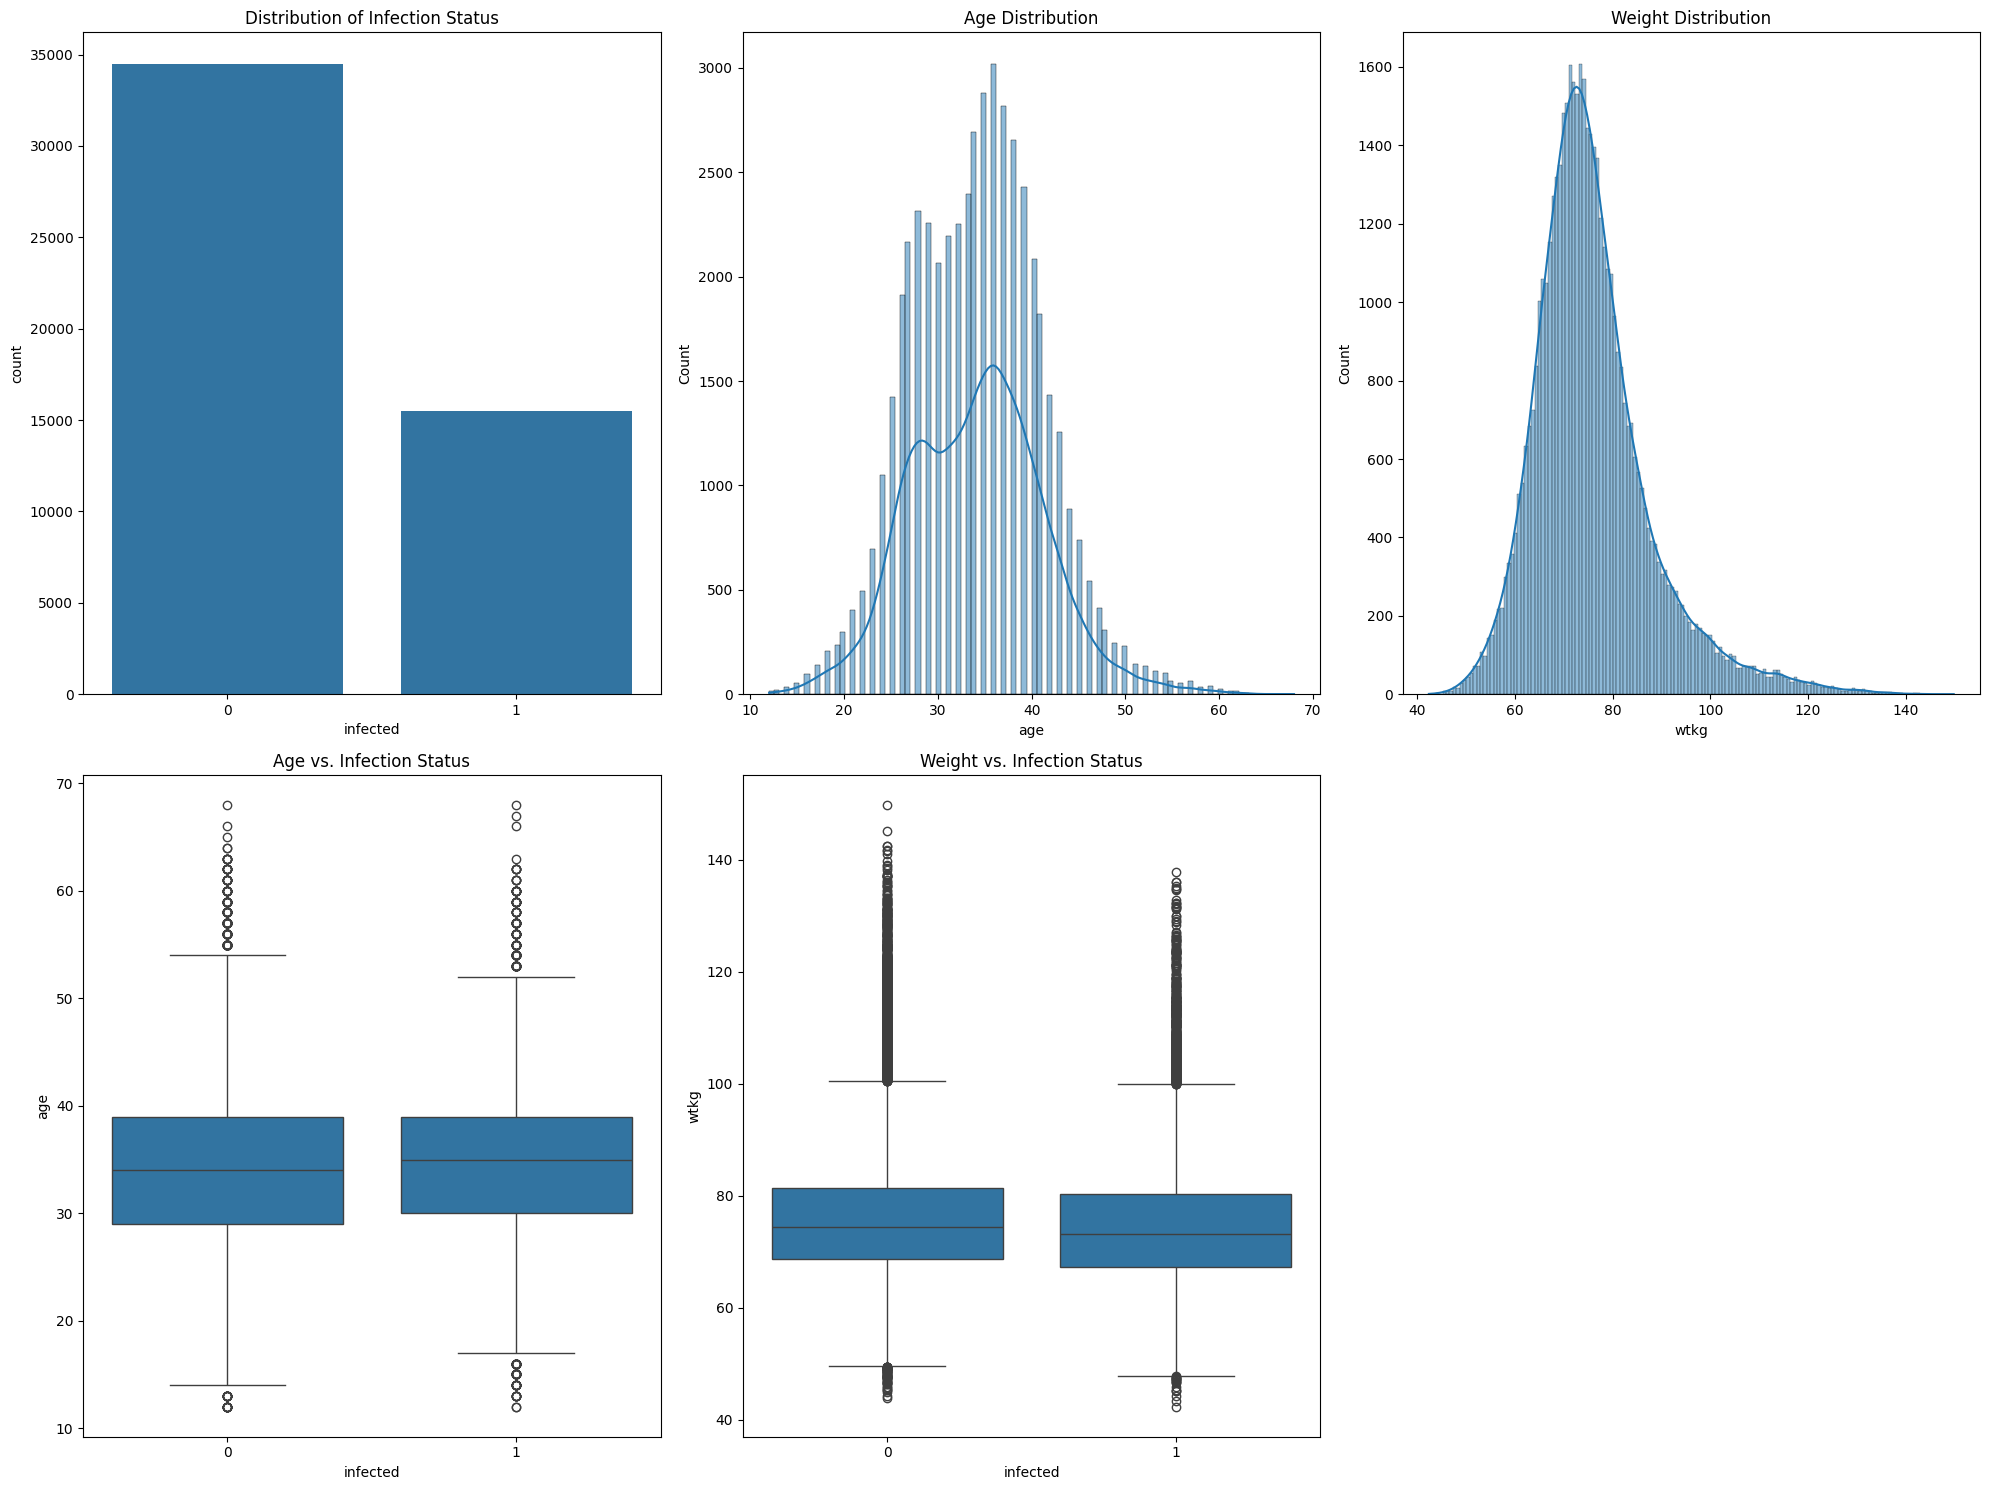

In [ ]:
# Set up the visualizations
plt.figure(figsize=(20, 15))


# Distribution of the target variable 'infected'
plt.subplot(2, 3, 1)
sns.countplot(x='infected', data=data)
plt.title('Distribution of Infection Status')

# Distribution of age
plt.subplot(2, 3, 2)
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')

# Distribution of weight (wtkg)
plt.subplot(2, 3, 3)
sns.histplot(data['wtkg'], kde=True)
plt.title('Weight Distribution')

# Boxplot of age vs. infection status
plt.subplot(2, 3, 4)
sns.boxplot(x='infected', y='age', data=data)
plt.title('Age vs. Infection Status')

# Boxplot of weight vs. infection status
plt.subplot(2, 3, 5)
sns.boxplot(x='infected', y='wtkg', data=data)
plt.title('Weight vs. Infection Status')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

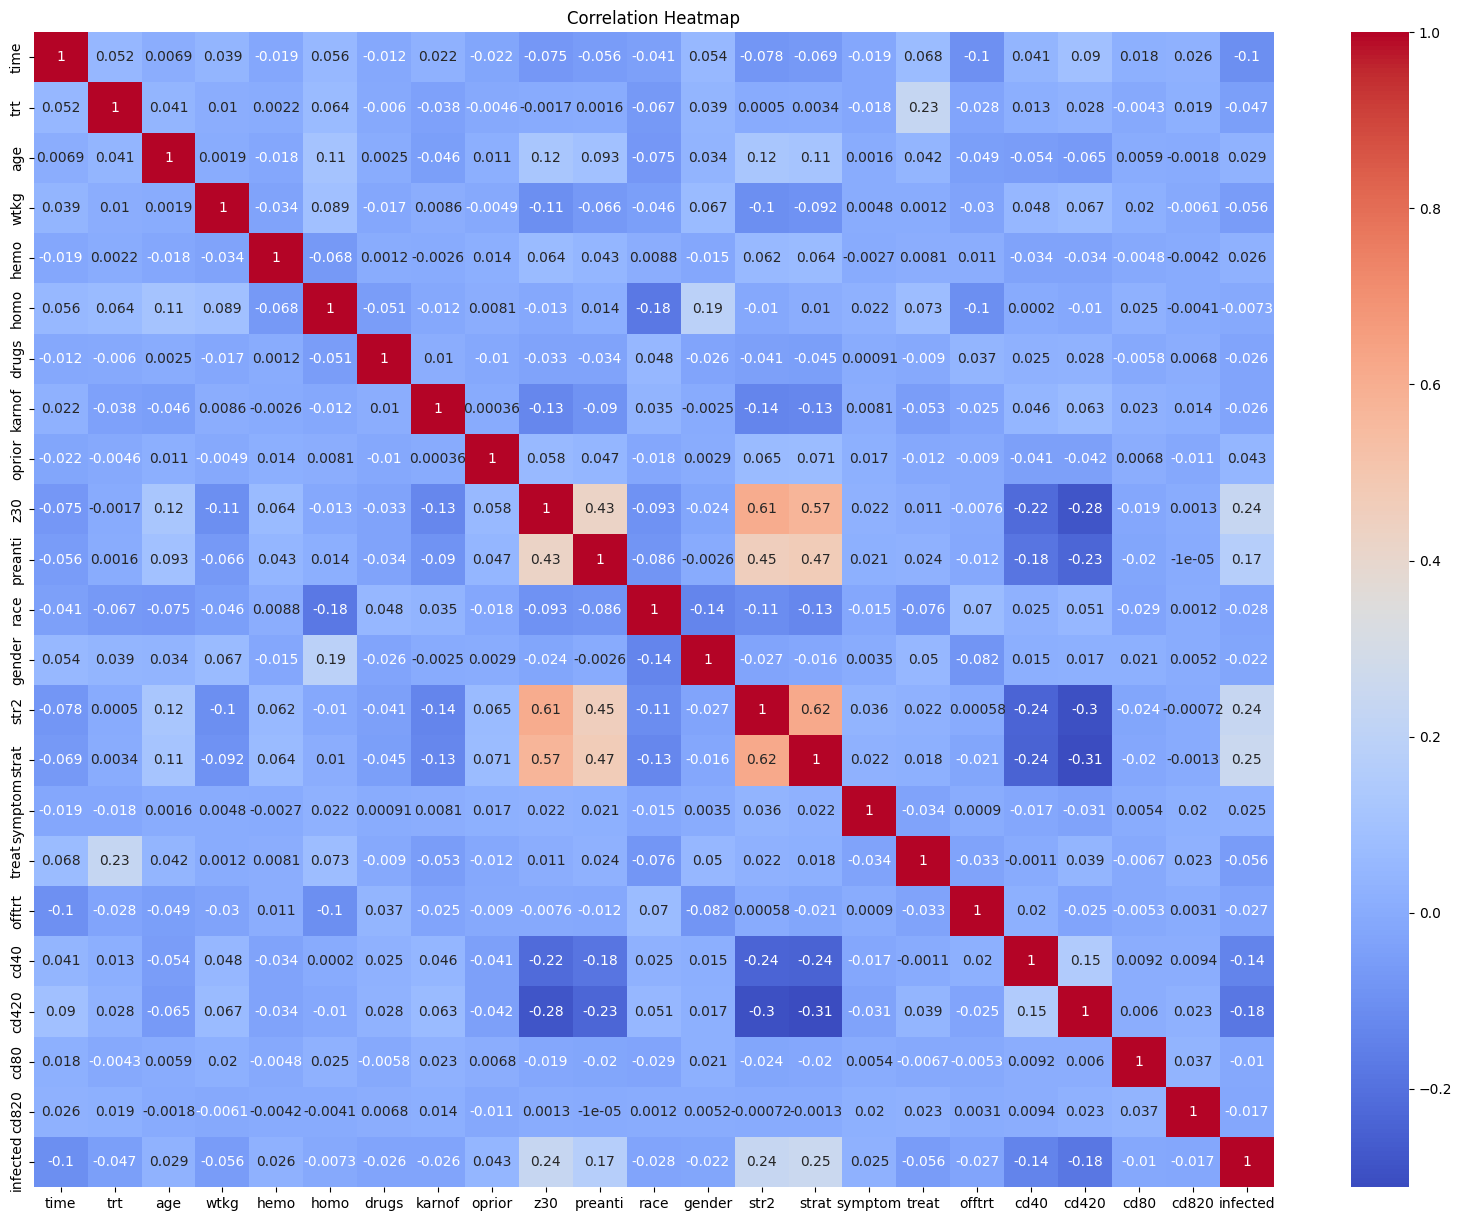

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Splitting the data into features and target variable
X = data.drop('infected', axis=1)
y = data['infected']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)


In [ ]:
# Get selected features' names
selected_features = X.columns[selector.get_support()]

# Train a RandomForest Classifier as an example
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test_selected)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix, selected_features

(0.6978,
 '              precision    recall  f1-score   support\n\n           0       0.73      0.89      0.80      6923\n           1       0.52      0.26      0.35      3077\n\n    accuracy                           0.70     10000\n   macro avg       0.62      0.58      0.57     10000\nweighted avg       0.67      0.70      0.66     10000\n',
 array([[6178,  745],
        [2277,  800]]),
 Index(['time', 'trt', 'wtkg', 'z30', 'preanti', 'str2', 'strat', 'treat',
        'cd40', 'cd420'],
       dtype='object'))

In [ ]:

print(selected_features)
print(report)
import joblib

# Save the model to a file
model_filename = 'random_forest_model_aids.pkl'
joblib.dump(rf_model, model_filename)

print(f"Model saved as {model_filename}")

Index(['time', 'trt', 'wtkg', 'z30', 'preanti', 'str2', 'strat', 'treat',
       'cd40', 'cd420'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      6923
           1       0.52      0.26      0.35      3077

    accuracy                           0.70     10000
   macro avg       0.62      0.58      0.57     10000
weighted avg       0.67      0.70      0.66     10000

Model saved as random_forest_model_aids.pkl


In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Train a Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_selected, y_train)

# Predictions with Logistic Regression
y_pred_lr = lr_model.predict(X_test_selected)

# Evaluation for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

In [ ]:
# Train an XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_selected, y_train)

# Predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluation for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)


In [ ]:
# accuracy, report, conf_matrix, selected_features

# Print all the results
print("Random Forest Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Random Forest Results:
Accuracy: 0.6978
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80      6923
           1       0.52      0.26      0.35      3077

    accuracy                           0.70     10000
   macro avg       0.62      0.58      0.57     10000
weighted avg       0.67      0.70      0.66     10000

Confusion Matrix:
 [[6178  745]
 [2277  800]]


In [ ]:
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", report_lr)
print("Confusion Matrix:\n", conf_matrix_lr)


Logistic Regression Results:
Accuracy: 0.705
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81      6923
           1       0.55      0.23      0.32      3077

    accuracy                           0.70     10000
   macro avg       0.64      0.57      0.57     10000
weighted avg       0.67      0.70      0.66     10000

Confusion Matrix:
 [[6353  570]
 [2380  697]]


In [ ]:
print("\nXGBoost Results:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", report_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)



XGBoost Results:
Accuracy: 0.694
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80      6923
           1       0.51      0.27      0.35      3077

    accuracy                           0.69     10000
   macro avg       0.62      0.58      0.58     10000
weighted avg       0.66      0.69      0.66     10000

Confusion Matrix:
 [[6105  818]
 [2242  835]]


In [ ]:
print("\nSelected Features:\n", selected_features)


Selected Features:
 Index(['time', 'trt', 'wtkg', 'z30', 'preanti', 'str2', 'strat', 'treat',
       'cd40', 'cd420'],
      dtype='object')
